<a href="https://colab.research.google.com/github/MatheusRQ/imersao-dados-desafio-final/blob/main/Notebooks/Desafio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introdução**

## **De onde vem esse projeto?**

Este projeto, assim como muitos outros com essa temática, vieram da *Imersão Dados Terceira Edição*.

## **Mas o que é isso?**

 Basicamente, foi uma iniciativa da Allura de ensinar as pessoas que, de preferência, tinham desde apenas conhecimento de estrutura de programação até um conhecimento mais avançado dentro do Data Science (Ciência de Dados). Essa iniciativa se propusera a praticar uma análise, simulando uma real, de um banco de dados de fato real. A imersão contará com 5 dias seguidos de aulas e desafios, além de 3 lives durante a semana e um discord para os alunos postarem seus resultados, tirarem suas duvidas (seja com um instrutor ou entre eles mesmos) e discutirem sobre o todo, se conhecendo, trocando redes socias, discutindo sobre outras áreas, etc. A imersão contou, também, com 3 instrutores das aulas que já são profissionais (uma inclusive sendo uma bióloga, o que coincidiu com o tema da imersão), além da participação de vários outros profissionais nas lives da semana.

## **De onde vem a Base de dados?**

 A base de dados desse projeto veio de um desafio feito pela universidade de Harvard (USA), que tinha como objetivo produzir um projeto de machine learning do qual conseguisse analisar as amostras de dados e automatizar os resultados.

## **Mas afinal, do que se trata a base de dados?**

 Essa base de dados se trata de uma pesquisa sobre Drug Discovery, que tinha a intenção de analisar o comportamento de diversos compostos sobre diversas condições (seja de tempo, dose, tipo de tratamento).

## **Ok, e o que é Drug Discovery?**

 Drug Discovery, ou Descobrimento de Drogas, na área de medicina, biotecnologia e farmacologia, é o processo de descobrir novos candidatos de medicamentos.
 
 Essa é uma das ciências mais antigas da historia humana, visto que, desde a era pré-histórica, se tem relatos de uso de ervas medicinais no tratamento de enfermidades (naquela época, claro, feito por instinto humano, igual ao cachorro que come mato para aliviar a dor no estomago). Sendo também vista vários e vários anos depois tanto em uma peça de argila escrita em sumério contendo 12 receitas com mais de 250 plantas, seja na china a mais de 2500 anos, usando plantas que são uteis até hoje na medicina chinesa moderna.

## **Beleza, mas o que exatamente esse projeto em especifico se propõe a fazer?**

 Bom, esse projeto tem como objetivo fazer algumas analises sobre essa base de dados, analisando os experimentos, os resultados e aplicando um pouco de machine learning para demonstar sobre o que o projeto de Harvard queria. Claro, aqui muitas coisas serão mais superficiais, já que uma analise mais objetiva e completa requereria a presença de uma equipe de pessoas com conhecimentos profundos de farmacologia, o que não é o caso. Também não será uma analise super complexa com os maiores fundamentos da ciência de dados ou do Machine Learning, visto que isso também necessitaria de uma ou mais pessoas especializadas em uma das áreas ou ambas, o que também não é o caso.

## **Ok, então podemos começar?**

 Claro, sem mais enrolação.

# **Import das Bibliotecas**

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# **Bancos de Dados Que são utilizados**

In [53]:
#Bancos de dados dos Testes feitos com os compostos
df = pd.read_csv('https://github.com/MatheusRQ/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true', compression='zip')

#Import dos reultados desses testes
df2 = pd.read_csv('https://github.com/MatheusRQ/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')

# **Análise Geral**

## **Bancos de dados**

Primeiramente, vamos dar uma olhada nos nossos bancos de dados e ver com o que estamos trabalahando.

In [54]:
#As 5 primeiras colunas da tabela de testes
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Podemos analisar aqui algumas coisas, como o tratamento usado no experimento, o número de dosagens, o tempo para tal experimento, e as drogas... que estão inelegíveis.

Bom, vamos entender melhor essa coluna. Uma pratica recorrente no Data Science é a decodificação de algumas informações. Isso ocorre para que o cientista em questão fique impossibilitado de por (por ou sem querer) seu viés pessoal em cima da pesquisa.

Porém, existe outra questão aqui. Como pontuado pela instrutora Vanessa na imersão, essas “drogas” não são remédios em si, mas sim compostos usados para verificar as reações que gerariam caso alguém tomasse aquele composto quando fosse efetivamente uma droga.

 Para facilitar então, eu mudarei o nome dessa coluna para “composto”.


In [55]:
mapa = {'droga':'composto'}
df.rename(columns=mapa, inplace = True)
df.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Também vemos a presença desses “g-x” e “c-x”. Essas colunas são, respectivamente, genes e compostos células. Os compostos celulares são, basicamente, estruturas celulares que estão sendo usadas para ver a reação delas em contato com tais substancias.

Também vemos esses números nessas colunas, essas são as expressões genicas desses experimentos. Ou seja, é a produção de alguma proteína pela célula, que se deve através da receita da fabricação no núcleo da célula que transporta essa informação pelo RNA para o ribossomo. Resumindo, esse número é a quantidade de RNA.

Mas esse número é bom? Isso é difícil de dizer. Para que a expressão genica não ficassem tão diferentes uma da outra, foram feitos cálculos matemáticos para chegar nesses números, e só quem sabe esses cálculos e o que são esses compostos poderia nos responder isso.


In [56]:
#As 5 primeiras colunas da tabela de resultados
df2.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Aqui já vemos uma diversidade estranha de tabelas. Elas são, basicamente, os MOAs ativados. 
MOAs são “Mecanismos de Ação”, que é basicamente a interação química entre o composto do experimento e a célula em questão.

Ok, então vamos começar a fazer algumas analises.

### **Graficos de Dose, Tempo, Tratamento e Top5 Compostos**

Aqui vamos ver qual o tipo de dose, tempo e tratamento com maior número de experimentos, além de um top 5 de Compostos mais usados.

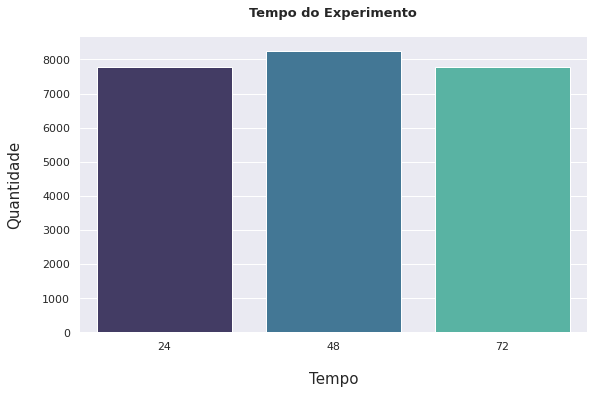

In [57]:
plt.figure(figsize=(20, 25))
ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'tempo',data = df,
                    palette = 'mako',
                   dodge = False)

ax1 = plt.title('Tempo do Experimento',
               pad = 20,
         fontsize = 13, fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('Tempo', labelpad = 20, fontsize = 15)
ax1 = plt.ylabel('Quantidade', labelpad = 20, fontsize = 15)

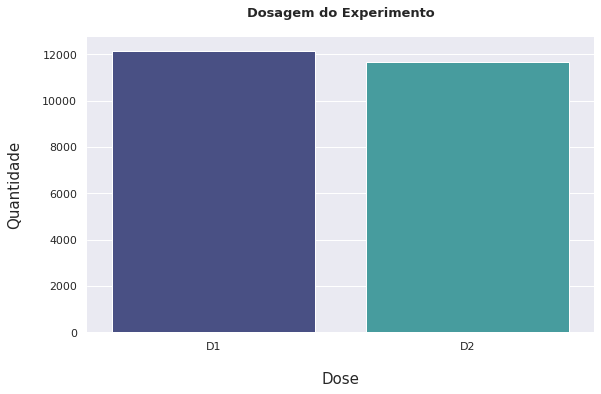

In [58]:
plt.figure(figsize=(20, 25))
ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'dose',data = df,
                    palette = 'mako',
                   dodge = False)

ax1 = plt.title('Dosagem do Experimento',
               pad = 20,
         fontsize = 13, fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('Dose', labelpad = 20, fontsize = 15)
ax1 = plt.ylabel('Quantidade', labelpad = 20, fontsize = 15)

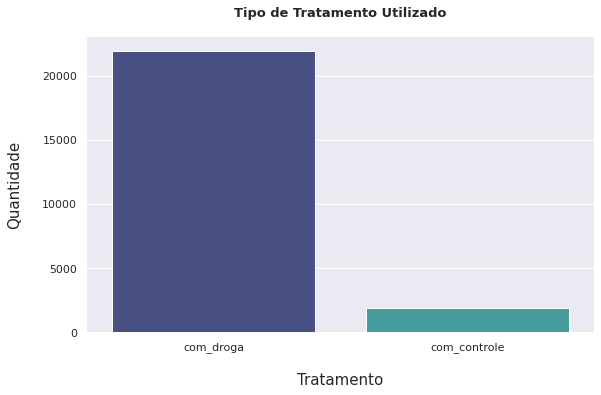

In [59]:
plt.figure(figsize=(20, 25))
ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'tratamento',data = df,
                    palette = 'mako',
                   dodge = False)

ax1 = plt.title('Tipo de Tratamento Utilizado',
               pad = 20,
         fontsize = 13, fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('Tratamento', labelpad = 20, fontsize = 15)
ax1 = plt.ylabel('Quantidade', labelpad = 20, fontsize = 15)

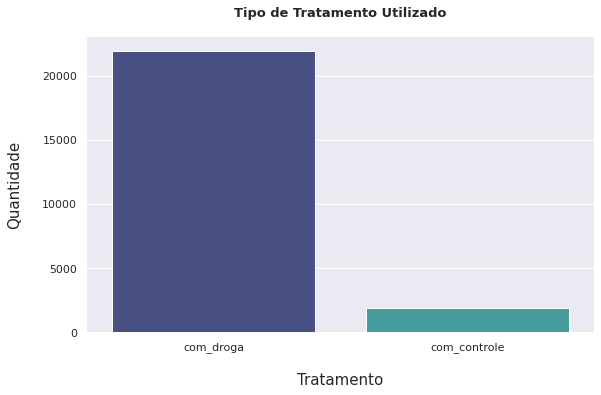

In [60]:
plt.figure(figsize=(20, 25))
ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'tratamento',data = df,
                    palette = 'mako',
                   dodge = False)

ax1 = plt.title('Tipo de Tratamento Utilizado',
               pad = 20,
         fontsize = 13, fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('Tratamento', labelpad = 20, fontsize = 15)
ax1 = plt.ylabel('Quantidade', labelpad = 20, fontsize = 15)

Ok, por que todos são tão equilibrados, mas o tratamento é tão desequilibrado?

Isso é uma pergunta simples de responder, basta vermos os tipos de compostos usados no "com_controle"

In [61]:
df_droga = df[df['tratamento'] == 'com_controle']
df_droga['composto'].unique()

array(['cacb2b860'], dtype=object)

Como dá para reparar, o "com_tratamento" conta com apenas um composto. O que é natural, ja que a ideia do controle é ver o resultado de um mesmo experimento com diversas das suas outras variaveis diferentes. Muitos compostos fariam a ideia não funcionar muito bem.

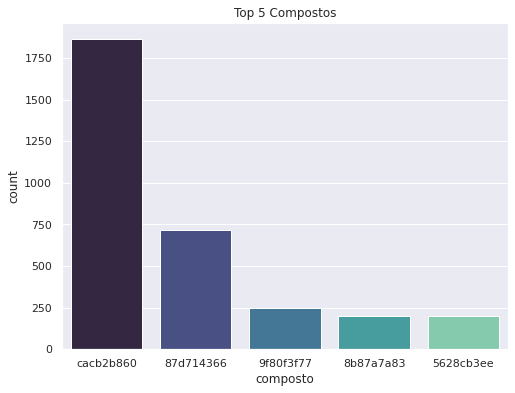

In [83]:
cod_compostos = df['composto'].value_counts().index[0:5]
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'composto', data=df.query('composto in @cod_compostos'), order = df['composto'].value_counts().index[0:5],palette='mako')
ax.set_title('Top 5 Compostos')
plt.show()

Obs: Novamente lembrando, esse primeiro é da categoria "com_controle". Ou seja, é exclusivo dessa categoria, e todos dessa categoria usaram ele, por isso seu número tão elevado.

## **Ideogramas Dos Genes e Compostos Celulares**

Aqui a ideia é fazer ideogramas para saber qual a média, o minimo e o maximo do grupo dos Genes e o grupo dos Compostos celulares.

In [62]:
#Função para a comfiguração visual da biblioteca utilizada seja inserida
sns.set()

### **Genes**

Text(0.5, 0, 'Média')

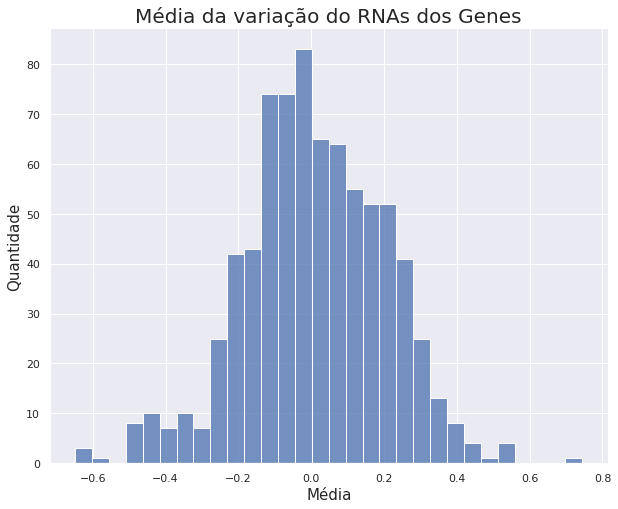

In [63]:
plt.figure(figsize = (10,8))
ax = sns.histplot(data =df.loc[:,'g-0':'g-771'].describe().T['mean'], bins = 30)
ax.set_title('Média da variação do RNAs dos Genes', size = 20)
plt.ylabel('Quantidade', size = 15)
plt.xlabel('Média', size = 15)

Text(0.5, 0, 'Minimo')

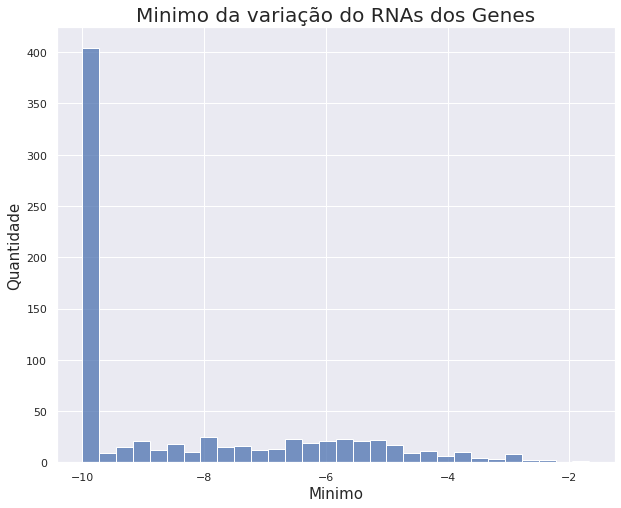

In [64]:
plt.figure(figsize = (10,8))
ax = sns.histplot(data = df.loc[:,'g-0':'g-771'].describe().T['min'], bins = 30)
ax.set_title('Minimo da variação do RNAs dos Genes', size = 20)
plt.ylabel('Quantidade', size = 15)
plt.xlabel('Minimo', size = 15)

Text(0.5, 0, 'Máximo')

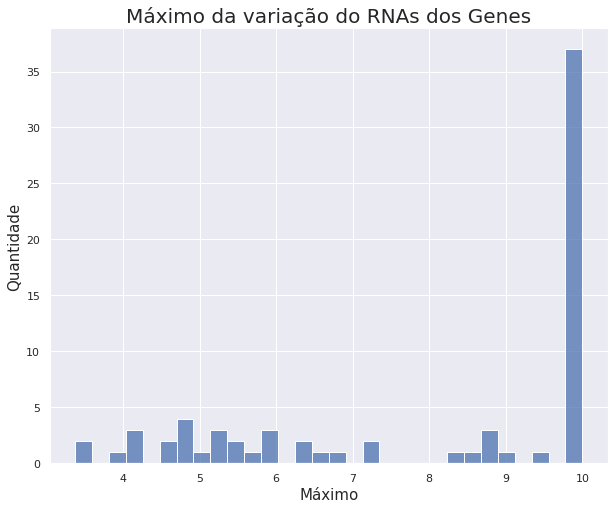

In [65]:
plt.figure(figsize = (10,8))
ax = sns.histplot(data = df.loc[:,'g-0':'g-71'].describe().T['max'], bins = 30)
ax.set_title('Máximo da variação do RNAs dos Genes', size = 20)
plt.ylabel('Quantidade', size = 15)
plt.xlabel('Máximo', size = 15)

Enquanto a média é mais focada entre o -0.2 e o 0.2, porém com uma curva normal, o mínimo e o máximo se encontram bem focados nas extremidades. Isso, claro, é o resultado visual daqueles cálculos que eu disse terem sido feitos para não deixar muito discrepante a variação entre os dados.

### **Compostos Celulares**

Text(0.5, 0, 'Média')

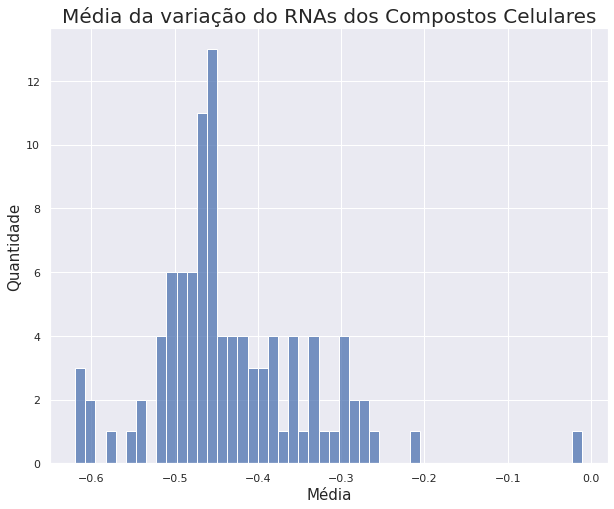

In [66]:
plt.figure(figsize = (10,8))
ax = sns.histplot(df.loc[:, 'c-0': 'c-99'].describe().T['mean'], bins = 50)
ax.set_title('Média da variação do RNAs dos Compostos Celulares', size = 20)
plt.ylabel('Quantidade', size = 15)
plt.xlabel('Média', size = 15)

Text(0.5, 0, 'Minimo')

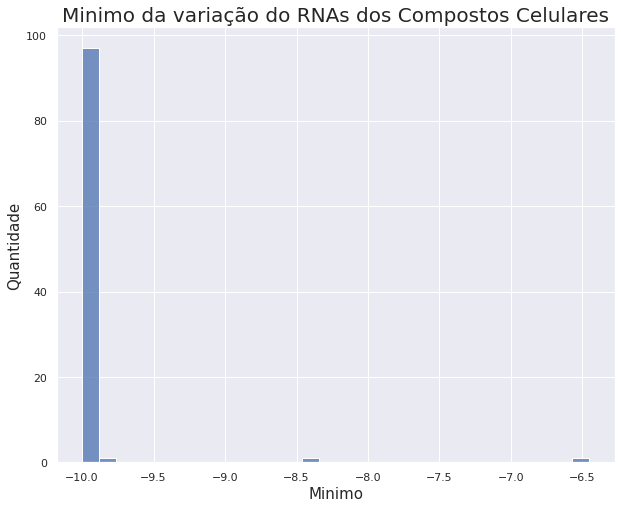

In [67]:
plt.figure(figsize = (10,8))
ax = sns.histplot(data = df.loc[:,'c-0': 'c-99'].describe().T['min'], bins = 30)
ax.set_title('Minimo da variação do RNAs dos Compostos Celulares', size = 20)
plt.ylabel('Quantidade', size = 15)
plt.xlabel('Minimo', size = 15)

Text(0.5, 0, 'Máximo')

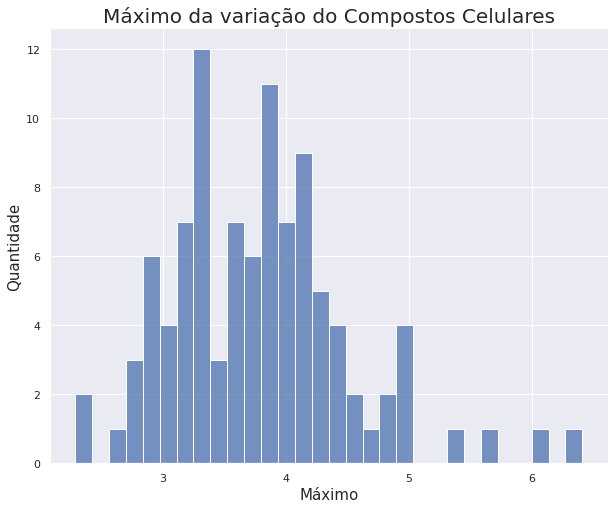

In [68]:
plt.figure(figsize = (10,8))
ax = sns.histplot(data = df.loc[:,'c-0': 'c-99'].describe().T['max'], bins = 30)
ax.set_title('Máximo da variação do Compostos Celulares', size = 20)
plt.ylabel('Quantidade', size = 15)
plt.xlabel('Máximo', size = 15)

Aqui já fica mais interessante. Enquanto a media é mais puxada para a esquerda em relação aos genes e o mínimo se mantém na extremidade, o máximo faz o famoso “histograma bimodal”. O que deve significar que seu máximo antes dos cálculos previamente cidades não eram altos ao ponto de ficar algo tão chamativo, como no caso dos genes.

## **Tabela de Frequencia**

Aqui, vamos poder analisar a distribuição percentual dos dados e ver o quanto é distribuido a quantidade de experimentos com_controle e com_droga, levando em conta as variaveis de tempo e dose.

In [84]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'],normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Da para se notar que o percentual de ambas as colunas em cada uma das variaveis é bastante similar com as outras.

# **Machine Learning**

Obs: Esta parte é mais focada em mostrar o que exatamente a ideia da competição de Harvard queria. Ela não necessariamente responde alguma dúvida da tabela.

## **Top 10 MOAs**

Primeiramente, para nos dar um guia, vamos ver qual foi o tipo de MOA com mais colunas na tabela de resultados

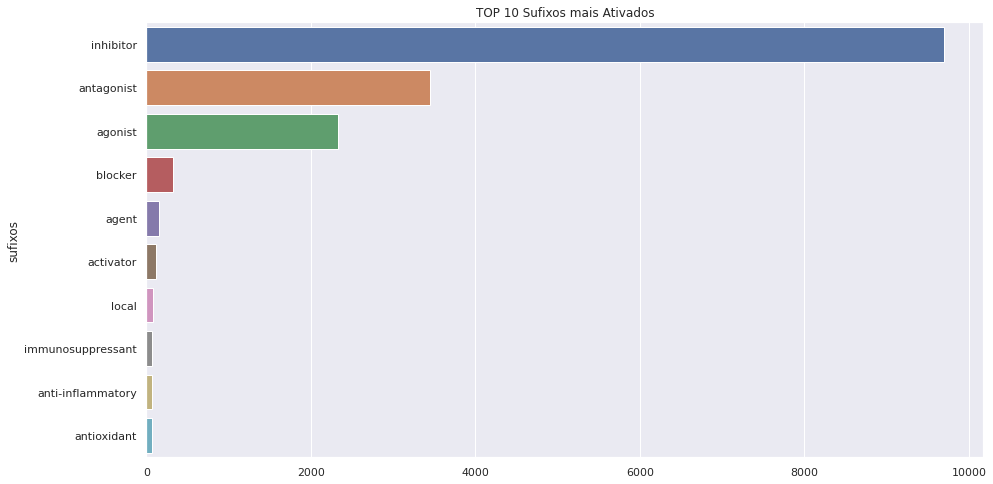

In [69]:
countMOA = df2.drop(['id'], axis=1).sum().sort_values(ascending=False)
countMOA = countMOA.reset_index()

countMOA.rename(columns={'index':'MOAs',0: 'Contagem'}, inplace=True)
countMOA['sufixos'] = countMOA['MOAs'].apply(lambda x: x.split('_')[-1])

countMOA_ativos_por_sufixos = countMOA.groupby('sufixos').sum()['Contagem'].sort_values(ascending=False)

fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(y=contagem_MOAs_ativos_por_sufixos.head(10).index,
            x=contagem_MOAs_ativos_por_sufixos.head(10).values, ax=ax, orient='h')
ax.set_title("TOP 10 Sufixos mais Ativados")

plt.show()

Otimo, então o inhibitor é o mais usado, vamos com ele.

O Inibidor é um sistema que vai inibir algo. Novamente, sem especialistas no assunto fica dificil falar se algum é bom ou ruim, mas isso não é importante agora.

## **Explicação**

Bom, a partir daqui, eu estarei utilizando algums modelos de Machine Learning.

### **Mas o que é Machine Learning?**

ML ou Aprendizado de Maquinas é a tecnica de ensinar um computador a achar padrões em algo e conseguir aplica-los na vida real, sem necessariamente um programador codifica-lo para tal.

### **Quais modelos você ira utilizar?**

Basicamente, 2 modelos. O Random Tree e o Grid Search CV. O que são esses modelos exatamente não vem ao caso, vamos focar no resultados em prática.

### **Preparação da Tabela**

Aqui eu estarei preparando a tabela para realizar a função do Machine Learning.

In [70]:
dd_inhibitor = df2.filter(regex = '_inhibitor$', axis='columns')
dd_inhibitor = pd.concat([df2['id'],dd_inhibitor],axis=1, join ='inner')
dd_inhibitor['n_moa_inhibitor'] = dd_inhibitor.drop('id',axis=1).sum(axis=1)
dd_inhibitor['ativo_moa_inhibitor'] = (dd_inhibitor['n_moa_inhibitor'] != 0)
df_dd = pd.merge(df,dd_inhibitor[['id','n_moa_inhibitor','ativo_moa_inhibitor']], on='id')
df_dd.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa_inhibitor,ativo_moa_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,False


## **Random Tree**

O que é o modelo Random Tree? Bom, é um modelo que cria varias arvores de decisão com amostras aleatórias do conjunto final.

Link com mais detalhes sobre a Árvore de decisão: https://www.lucidchart.com/pages/pt/o-que-e-arvore-de-decisao

### **Primeiro teste**

O primeiro teste que eu quero fazer é até onde eu consigo chegar apenas com as colunas "g-x" e "c-x".

In [71]:
x = df_dd.select_dtypes('float64')
y = df_dd['ativo_moa_inhibitor']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y, random_state = 376)
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.7654839386941004

Bem, o resultado não é muito bom.

Você pode até pensar "nossa, mas 76.5% não é tão ruim"

Aqui, nós estamos falando de compostos que irão virar remédios. Em relação a remédios, é uma questão de vida ou morte, então algo abaixo de, ao menos, 95%(se não mais) não é bom o suficiente.

### **Segundo teste**

Agora, quero ver o quão longe chegamos se considerar todas as variaveis dos gráficos que fizemos acima.

Obs: O composto não será utilizado, pois isso poderia fazer a maquina se acostumar com a presença dos compostos que ja existem, o que poderia faze-la não conseguir analisar um novo. Ou seja, o famoso processo do "OverFit"

Link com mais detalhes: https://en.wikipedia.org/wiki/Overfitting

In [72]:
x = df_dd.drop(['id', 'n_moa_inhibitor', 'ativo_moa_inhibitor', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento','tempo', 'dose'])
y = df_dd['ativo_moa_inhibitor']
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify=y, random_state = 376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.7698929246273357

Bom, 76.9% é melhor que 76.5%, mas não o suficiente

## **GridSearchCV**

O que é o GridSearchCV?

Basicamente, uma árvore de decisão que classifica os dados de forma inteligente. Mostrando qual profundidade retornou os melhores resultos e afins.

Link com mais Sobre: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Obs: Eu ja irei usar todas as colunas, ja que anteriormente deu para ver que o modelo com elas ja trazia um resultado melhor.

In [75]:
EsPara = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

x = df_dd.drop(['id', 'n_moa_inhibitor', 'ativo_moa_inhibitor', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = df_dd['ativo_moa_inhibitor']

ModTree = DecisionTreeClassifier()

clf = GridSearchCV(ModTree, EsPara, cv = 5, return_train_score = True, scoring='accuracy')
search = clf.fit(x,y)
results_GridSearchCV = search.cv_results_
In_Best_Para = search.best_index_

In [77]:
print(f"mean_train_score {results_GridSearchCV['mean_train_score'][In_Best_Para]:.2f}")
print(f"mean_test_score {results_GridSearchCV['mean_test_score'][In_Best_Para]:.2f}")

mean_train_score 0.76
mean_test_score 0.75


In [76]:
results_GridSearchCV['params'][In_Best_Para]

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 32,
 'min_samples_split': 128}

Como dá pra notar, apesar do melhor resultado, ele ainda não passa dos 75%.

Claro, a ideia não era completar o desafio, ja que foram maide de 5 mil participantes e só um realmente levou o prêmio. A ideia era mostrar a dificuldade desse tipo de experimento, embora aqui só tenha sido feito algo *muito* basico.

# **Conclusão**

Com os dados analisados, podemos tirar as seguintes conclusões:

  1 - O tipo de Dose mais utilizado foi de 1 Dose;

  2 - O tipo de tratamento mais utilizado foi com drogas, e o motivo é porque o controle é algo mais focado e fechado, tanto que usa apenas um tipo de composto.

  3- O tempo mais utilizado foi o de 48h, seguido por 72 horas.

  4 - A droga mais utilizada foi o cacb2b860, que é a droga da categoria "com_controle". Ela é seguida pelo 87d714366.

  5 - A média dos genes é bem centrada no 0, enquanto seu minimo e máximo são, respectivamente, focados na esquerda e na direita, o que é resultado dos calculos utilizados nesses números para a diferença entre um resultado e outro não ficar muito discrepante.

  6 - Ja a média dos compostos celulares é mais focada para a esquerda, seu minimo é mais focado na esquerda, porém seu máximo é bem variado e fez um histograma bimodal, ou seja, com 2 picos. O que demonstra que, antes dos calculos, essa coluna não ultrapassava muito o 10.

  7 - A tabela de frequencia demonstrou que a separação do tipo de tratamento (com as variaveis de tempo e dose), apesar de muito diferentes entre o tipo de tratamento, são muito equilibradas dentro de sua propria coluna.

  9 - Apesar da utilização de 2 tipos de machine learning, não foi possivel chegar perto do que o experimento de Harvard queria. Claro, isso seria algo muito complexo de se fazer, mas é bom para ver os tipos de dificuldade que esse tipo de experimento traz.

# **Palavras finais**

Gostaria de agradecer a Allura e a todos os envolvidos nesse projeto. Sem duvidas foi uma experiencia incrível que, com altas chances, vai mudar muito a carreira de todos os participantes. Sei que meu projeto foi muito simples e, apesar de estar o submetendo ao desafio, não espero ganhar a bolsa. Porém, qualquer comentário no pouco que fiz seria ótimo. Um grande abraço a todos e boa sorte nos projetos futuros, que provavelmente serão tão bons se não melhores que esse!